In [2]:
#!pip install scikit-learn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Here's a breakdown of the columns:

1. `age`: The age of the patient.
2. `sex`: Gender of the patient (0 for female, 1 for male).
3. `cp`: Chest pain type (assumed to be categorical).
4. `trestbps`: Resting blood pressure.
5. `chol`: Serum cholesterol level.
6. `fbs`: Fasting blood sugar (1 for true, 0 for false).
7. `restecg`: Resting electrocardiographic results (assumed to be categorical).
8. `thalach`: Maximum heart rate achieved.
9. `exang`: Exercise-induced angina (1 for yes, 0 for no).
10. `oldpeak`: ST depression induced by exercise relative to rest.
11. `slope`: The slope of the peak exercise ST segment (assumed to be categorical).
12. `ca`: Number of major vessels colored by fluoroscopy (assumed to be categorical).
13. `thal`: Thalassemia (assumed to be categorical).
14. `target`: The target variable, presumably indicating the presence or absence of a heart-related condition (1 for presence, 0 for absence).



In [4]:

# Load the dataset and rename columns
columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol",
           "fasting_blood_sugar", "resting_ecg", "max_heart_rate", "exercise_angina",
           "st_depression", "st_slope", "num_vessels", "thalassemia", "target"]

In [5]:
heart_data = pd.read_csv("heart.csv", names=columns, header=None)

In [6]:
heart_data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_vessels,thalassemia,target
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
heart_data.dropna(inplace=True)

In [8]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     304 non-null    object
 1   sex                     304 non-null    object
 2   chest_pain_type         304 non-null    object
 3   resting_blood_pressure  304 non-null    object
 4   cholesterol             304 non-null    object
 5   fasting_blood_sugar     304 non-null    object
 6   resting_ecg             304 non-null    object
 7   max_heart_rate          304 non-null    object
 8   exercise_angina         304 non-null    object
 9   st_depression           304 non-null    object
 10  st_slope                304 non-null    object
 11  num_vessels             304 non-null    object
 12  thalassemia             304 non-null    object
 13  target                  304 non-null    object
dtypes: object(14)
memory usage: 33.4+ KB


In [9]:
# convert to numeric
numeric_columns = ["age", "resting_blood_pressure", "cholesterol", "max_heart_rate", "st_depression", "num_vessels"]

# Convert the specified columns to numeric
for column in numeric_columns:
    heart_data[column] = pd.to_numeric(heart_data[column], errors="coerce")

# Drop rows with missing values (if any)
heart_data.dropna(inplace=True)


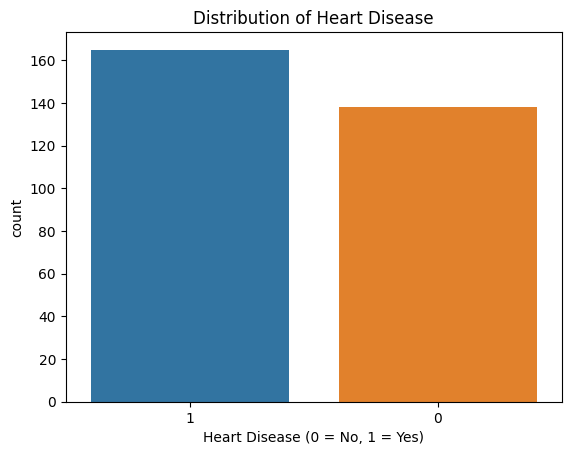

In [10]:
# Exploratory Data Analysis (EDA)
sns.countplot(x="target", data=heart_data)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.title("Distribution of Heart Disease")
plt.show()

In [11]:
# Split the data into features (X) and target (y)
X = heart_data.drop("target", axis=1)
y = heart_data["target"]

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Add more models to the dictionary
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

best_accuracy = 0
best_model = None

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    
    # Choose the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print('*'*80)
print(f"The best performing model is {type(best_model).__name__} with an accuracy of {best_accuracy:.2f}")


Random Forest Accuracy: 0.84
SVM Accuracy: 0.82
Logistic Regression Accuracy: 0.81
K-Nearest Neighbors Accuracy: 0.87
Gradient Boosting Accuracy: 0.78
********************************************************************************
The best performing model is KNeighborsClassifier with an accuracy of 0.87


In [17]:
def get_user_input():
    user_data = {}
    user_data["age"] = float(input("Age (in years):\t\t\t"))
    user_data["sex"] = float(input("Sex (1 for male, 0 for female):\t"))
    user_data["chest_pain_type"] = float(input("Chest Pain Type (1-4):\n1:\tTypical angina (chest pain related to decrease blood supply to the heart)\n2:\tAtypical angina (chest pain not related to heart)\n3:\tNon-anginal pain (typically esophageal spasms)\n4:\tAsymptomatic (no chest pain)\nEnter the corresponding number:\t"))
    user_data["resting_blood_pressure"] = float(input("Resting Blood Pressure (in mm Hg, e.g., 120):\t"))
    user_data["cholesterol"] = float(input("Cholesterol (in mg/dl, e.g., 200):\t\t"))
    user_data["fasting_blood_sugar"] = float(input("Fasting Blood Sugar (1 for > 120 mg/dl, 0 for <= 120 mg/dl):\t"))
    user_data["resting_ecg"] = float(input("Resting ECG (0-2):\n0:\tNormal\n1:\tAbnormality in ST-T wave\n2:\tHypertrophy\nEnter the corresponding number:\t"))
    user_data["max_heart_rate"] = float(input("Maximum Heart Rate Achieved (e.g., 150):\t"))
    user_data["exercise_angina"] = float(input("Exercise Induced Angina (1 for yes, 0 for no):\t"))
    user_data["st_depression"] = float(input("ST Depression Induced by Exercise Relative to Rest (in mm)(e.g., 2.3):\t"))
    user_data["st_slope"] = float(input("Slope of the Peak Exercise ST Segment (1-3):\n1:\tUpsloping\n2:\tFlat\n3:\tDownsloping\nEnter the corresponding number:\t"))
    user_data["num_vessels"] = float(input("Number of Major Vessels Colored by Fluoroscopy (0-3):\t"))
    user_data["thalassemia"] = float(input("Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect):\t"))
    return user_data

# Get user input for prediction
user_input = get_user_input()
user_data = pd.DataFrame(user_input, index=[0])


Please enter the following information:


In [18]:
# Get user input for prediction
user_input = get_user_input()
user_data = pd.DataFrame(user_input, index=[0])

# Standardize the user input
user_data = scaler.transform(user_data)

# Predict using the best model
prediction = best_model.predict(user_data)
if prediction[0] == 1:
    print('*'*60)
    print("Based on the input, you are at risk of heart disease.")
    print('*'*60)
else:
    print('*'*60)
    print("Based on the input, you are not at risk of heart disease.")
    print('*'*60)

Please enter the following information:
************************************************************
************************************************************
Based on the input, you are not at risk of heart disease.
